In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

from warnings import filterwarnings

C:\Users\Sony\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv(r"C:\Users\Sony\Desktop\JUPYTER NOTEBOOK\UDEMY\PERIAN DATA SCIENCE\RESOURCES USED IN COURSE\DATA\gene_expression.csv")

In [3]:
data.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
data.tail()

,Gene One,Gene Two,Cancer Present
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0
2999,4.6,8.2,0


In [5]:
data.shape

(3000, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [7]:
from skimpy import skim

skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3000   │ │ float64     │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA    ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Gene One                │     0 │       0 │     5.6 │    1.8 │    1 │    4.3 │    6.9 │      10 │  ▁▅██▅▂  │  │
│ │ Gene Two                │     0 │       0 │     5.4 │    1.7 │    1 │      4 │    6.7 │      10 │  ▁▆██▅▁  │  │
│ │ Cancer Present          │     0 │       0 │     0.5 │    0.5 │    0 │      0 │      1 │       1 │  █    █  │  │
│ └─────────────────────────┴───────┴─────────┴─────────┴────────┴──────┴────────┴────────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
data["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

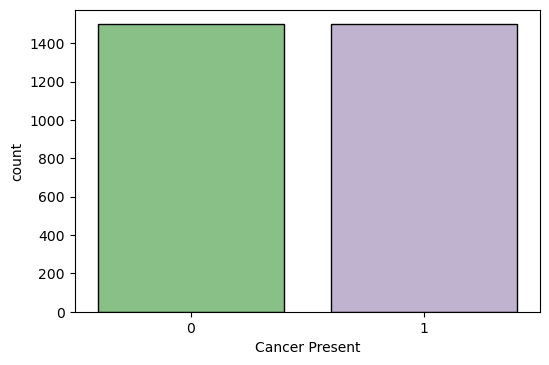

In [9]:
plt.figure(dpi = 100)

sns.countplot(data = data , x = "Cancer Present" , palette = "Accent", edgecolor = "black");

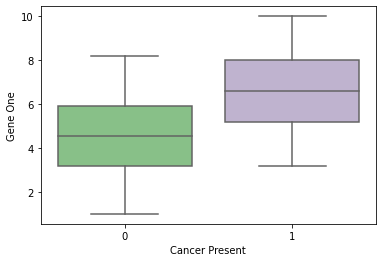

In [10]:
sns.boxplot(data = data , x = "Cancer Present" , y = "Gene One", palette = "Accent");

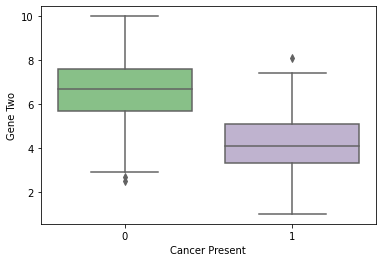

In [11]:
sns.boxplot(data = data , x = "Cancer Present" , y = "Gene Two", palette = "Accent");

In [12]:
data.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

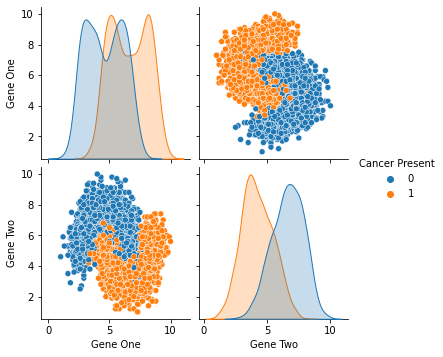

In [13]:
sns.pairplot(data = data , hue = "Cancer Present")

<AxesSubplot:>

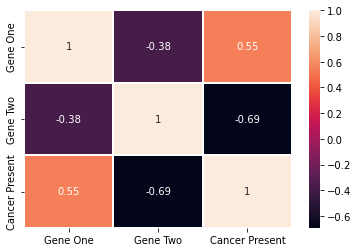

In [14]:
sns.heatmap(data.corr() , annot=True , linewidth = 0.2)

In [15]:
X = data.drop("Cancer Present" , axis = 1)

y = data["Cancer Present"]

In [16]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_model = KNeighborsClassifier(n_neighbors= 1) 

#1st we will check with only k = 1

In [22]:
knn_model.fit(scaled_X_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_pred = knn_model.predict(scaled_X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix , classification_report

In [25]:
accuracy_score(y_test , y_pred)

0.9011111111111111

In [26]:
confusion_matrix(y_test , y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


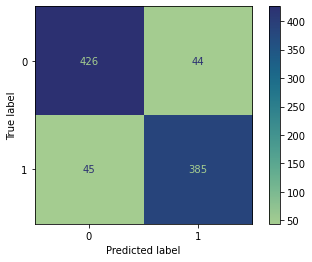

In [27]:
plot_confusion_matrix(knn_model , scaled_X_test , y_test, cmap = "crest")

In [28]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



### Conclusion :
    
Since our dataset was balanced (i.e cancer present and not present were equal) so all the evaluation metrics are in same range.

Further, since in this model we choose n_neighbors = 1 i.e k = 1 so our next task is to find the optimum value of k to improve model performance.

# HOW TO CHOOSE PERFECT VALUE OF K

The perfect value of K is that value where our error is minimum (1 - accuracy).
We have to use for loop and find each value of K and the corresponding error. We will see as the value of K will go on increasing the error will go on reducing. But there comes a point where reducing the value of K doesnot significantly reduce the error.

In [29]:
test_errors = []

for k in range(1,30):
    
    knn_model = KNeighborsClassifier(n_neighbors= k)
    
    knn_model.fit(scaled_X_train , y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    acc_score = accuracy_score(y_test , y_pred_test)
    
    error = 1 - acc_score
    
    test_errors.append(error)
    

In [30]:
test_errors

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

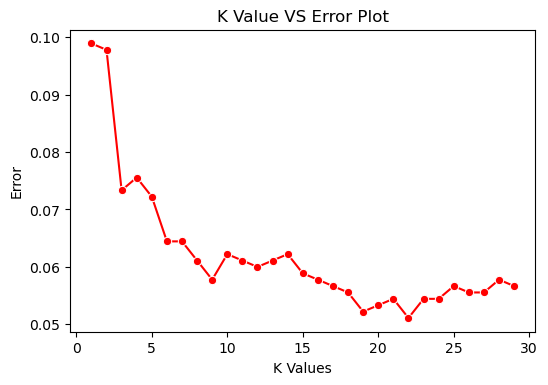

In [40]:
plt.figure(dpi = 100)

sns.lineplot(x = range(1,30) , y = test_errors, color = "red" , marker = "o" )

plt.xlabel("K Values")

plt.ylabel("Error")

plt.title("K Value VS Error Plot");

### Conclusion

From above plot we can say that after k = 7 the error values are not significantly reducing. So instead of making the model more complex by selecting K value like k = 22. We should choose k = 7 and fit our model.

In [41]:
knn_model_new = KNeighborsClassifier(n_neighbors=7)

In [42]:
knn_model_new.fit(scaled_X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
y_pred_new = knn_model_new.predict(scaled_X_test)

In [45]:
acc_old = accuracy_score(y_test , y_pred)

In [46]:
acc_old

0.9011111111111111

In [47]:
acc_new = accuracy_score(y_test , y_pred_new)

In [48]:
acc_new

0.9355555555555556

In [49]:
confusion_matrix(y_test , y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [51]:
confusion_matrix(y_test , y_pred_new)

array([[442,  28],
       [ 30, 400]], dtype=int64)

In [53]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [54]:
print(classification_report(y_test , y_pred_new))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       470
           1       0.93      0.93      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

